## Shainan Agrawal
### Date: 11/06/2020
<font color="red">

### Assignment Grade: 32/35
### very Good. 

</font>

<font color = ‘blue’ size = 1>

### Grading Comments – Totality of all points noted below resulted in a reduction of 3 Points

1. display_movies_by_category() Function:
    
    a. Line 4: The query string should have '?' in place of embedded {movie_category} and {minimum running time}. The parameters received via the function header is passed into the querty string via arguments to the execute statement on line 12. (-3)
    
    b. Line 12: the correct execute statement would pass in the received category and running time values to the query string as follows:
    <code> 
    movie_category_cursor.execute(movies_category_query, \
        (movie_category,minimum_running_time))
    </code>
    
    
2. Main() function:
    
    a. Line 6: The correct value for minimum running time is supposed to be 90 minute, and not 60 mins. 
</font>

###  Access movies.sqlite database and display movie results as per select query
#### A program to access SQL Movies Database and write SQL queries to display movie categories and details. 
#### Running time is displayed in Scatter Plot. Count of number of movies by categoryis diplayed in Bar Chart.

In [1]:
def get_connection():
    """Access SQLite database movies.sqlite and open connection with Database"""
    
    import sqlite3
    DataBase_File = "/Users/cis_developer/CIS5357Fall2020/movies.sqlite"
    connection = sqlite3.connect(DataBase_File)
    return connection
    

In [2]:
def close_connection(connection):
    """ Close the opened connection with Database"""
    
    from contextlib import closing
    if connection:
        connection.close()
    

In [3]:
def display_movies_by_category(connection,movie_category, minimum_running_time):
    """SQL SELECT query for movies classified as the specified genre and minimum running time"""
    
    movies_category_query = (f"""SELECT movieid, movie.name, year, minutes, category.name
                                 FROM movie INNER JOIN category
                                 ON movie.categoryID = category.CategoryID
                                 WHERE category.name = '{movie_category}' 
                                 and minutes >= {minimum_running_time}""")

    connection = get_connection()
    movie_category_cursor = connection.cursor()
    movie_category_cursor.execute(movies_category_query)
    movie_category_results = movie_category_cursor.fetchall() 
    print(f"\n{format('Category','<8')}\t{format('Movie ID','>5')}\t {format('Title','<30')}\
    \t\t\t{format('Year','>5')}\t{format('Minutes','>4')}")
    print(f"{format('--------','>8')}\t{format('--------','>5')}\t {format('-----','<30')}\
    \t\t\t{format('----','>5')}\t{format('-------','>4')}")
    for movie_categoy_record in movie_category_results:
            print(f"{format(movie_categoy_record[4],'<8')}\t{format(movie_categoy_record[0],'>5')}\
            {format(movie_categoy_record[1],'<30')}\
              \t\t{format(movie_categoy_record[2],'>5')}\t{format(movie_categoy_record[3],'>4')}")


In [4]:
def display_movie_length(connection):
    """SQL SELECT query to retrieve movie ID and running length for each movie in the database"""

    movie_id_list = []
    movie_length_list = []
    movies_length_query = """SELECT movieid, minutes
                             FROM movie
                             ORDER BY movieid asc"""

    movie_length_cursor = connection.cursor()
    movie_length_cursor.execute(movies_length_query)
    movie_length_results = movie_length_cursor.fetchall()

    for i in range(0,len(movie_length_results)):
        movie_id = movie_length_results[i][0]
        movie_length = float(movie_length_results[i][1])

        movie_id_list.append(movie_id)
        movie_length_list.append(movie_length)
    display_scatter_plot(movie_id_list,movie_length_list)
    

In [5]:
def display_scatter_plot(movie_id_list,movie_length_list):
    """Scatter Plot to display running time of each movie versus Movie ID"""
    
    import matplotlib.pyplot as  plt
    OFFSET_X = 5
    OFFSET_Y = 5

    plt.figure(figsize=(8,8))
    plt.style.use('seaborn')  
    plt.scatter(movie_id_list,movie_length_list,s=130,marker="o",color='b')
    plt.title('Movie ID versus Movie Duration Scatter Plot',fontsize=14)
    plt.ylabel('Running Time in Minutes',fontsize=12)
    plt.xlabel('Movie ID',fontsize=12)
    plt.xlim(0,max(movie_id_list)+OFFSET_X)
    plt.ylim(0,max(movie_length_list)+OFFSET_Y)
    plt.tick_params(axis ='both', which ='both', length = 3)
    

In [6]:
def display_movie_count_by_category(connection):
    """SELECT query to retrieve a count of movies by category"""

    movie_category_list = []
    movie_count_list=[]

    movie_count_query = """SELECT category.name, count(movie.categoryID)
                           FROM movie INNER JOIN category 
                           ON movie.categoryID = category.CategoryID
                           GROUP BY category.name"""
    
    movie_count_cursor = connection.cursor()
    movie_count_cursor.execute(movie_count_query)
    movie_count_results = movie_count_cursor.fetchall() 

    for i in range(0,len(movie_count_results)):
        movie_category = movie_count_results[i][0]
        movie_count = int(movie_count_results[i][1])

        movie_category_list.append(movie_category)
        movie_count_list.append(movie_count)
    
    display_bar_plot(movie_category_list,movie_count_list) 
    
    print(f"\n{format('Category','<8')}\t{format('Number of Movies','>5')}")
    print(f"{format('----------','<8')}\t{format('-----------------','>5')}")
    
    for movie_category_record in movie_count_results:
            print(f"{format(movie_category_record[0],'<8')}\t{format(movie_category_record[1],'>15')}")
    

In [7]:
def display_bar_plot(movie_category_list,movie_count_list):
    """Bar Plot to display number of movies versus Movie Genre"""
    
    import matplotlib.pyplot as  plt
    OFFSET=1

    plt.figure(figsize=(4,4))
    plt.style.use('seaborn')
    plt.bar(movie_category_list,movie_count_list,color=['r','b','g'],width=0.4, align='center')
    plt.grid(True)
    plt.ylim(min(movie_count_list)-OFFSET,max(movie_count_list)+OFFSET)
    plt.title('Number of Movies by Genre')
    plt.xlabel('Movie Genre')
    plt.ylabel('Number of Movies')
    plt.tick_params(axis ='both', which ='both', length = 3)
    

In [8]:
def main():
    """This is the main driver program that controls the flow of execution"""

    connection = get_connection() 
    display_movies_by_category(connection,'History',120)
    display_movies_by_category(connection,'Animation',60) 
    display_movie_count_by_category(connection)
    display_movie_length(connection)
    close_connection(connection)
    


Category	Movie ID	 Title                             			 Year	Minutes
--------	--------	 -----                             			 ----	-------
History 	    9            Gandhi                                      		 1982	 191
History 	   11            Lawrence of Arabia                          		 1962	 216
History 	   12            Hotel Rwanda                                		 2004	 121
History 	   13            Twelve Years a Slave                        		 2013	 134

Category	Movie ID	 Title                             			 Year	Minutes
--------	--------	 -----                             			 ----	-------
Animation	    1            Spirit: Stallion of the Cimarron              		 2002	  83
Animation	    2            Spirited Away                               		 2001	 125
Animation	    3            Aladdin                                     		 1992	  90
Animation	    4            Ice Age                                     		 2002	  81
Animation	    5            Toy Story            

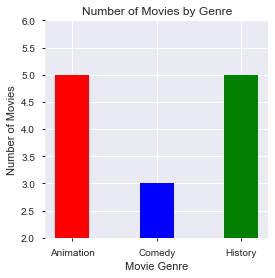

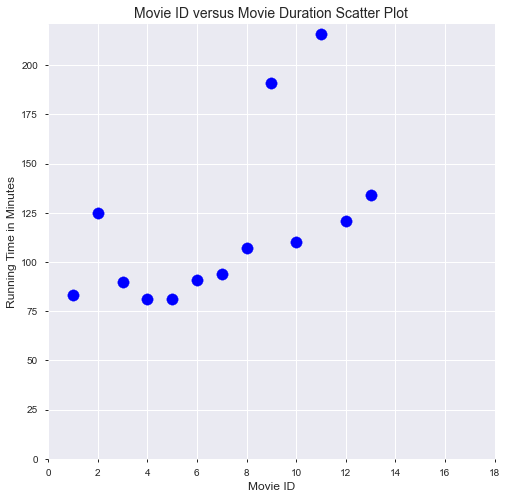

In [9]:
main()